In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston

In [3]:
# загружаем данные о ценах на жилье в Бостоне
boston = load_boston()
# выполняем стандартизацию
minmaxscaler = MinMaxScaler()
boston.data = minmaxscaler.fit_transform(boston.data)

In [4]:
#пишем собственный класс, строящий линейную регрессию
# с помощью метода градиентного спуска
class SimpleLinearRegression_GD:
    """
    Параметры:
    lr: float, по умолчанию 0.01
    Темп обучения.
    num_iter: int, по умолчанию 10000
    Количество итераций.
    fit_intercept: bool, по умолчанию False
    Добавление константы.
    verbose: bool, по умолчанию True
    Печать результатов градиентного спуска.
    loss_visualize: bool, по умолчанию True
    Построение кривой функции потерь.
    """
    
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=False,
                 verbose=True, loss_visualize=True):
        # темп обучения
        self.lr = lr
        # количество итераций градиентного спуска
        self.num_iter = num_iter
        # добавление константы
        self.fit_intercept = fit_intercept
        # печать результатов градиентного спуска
        self.verbose = verbose
        # визуализация кривой функции потерь
        self.loss_visualize = loss_visualize
        # список, в котором будем хранить значения функции потерь
        self._loss_by_iter = []
        
    # частный метод __add_intercept добавляет константу
    def __add_intercept(self, X):
        # создаем массив из единиц, количество единиц
        # равно количеству наблюдений
        intercept = np.ones((X.shape[0], 1))
        # конкатенируем массив из единиц с массивом
        # признаков по оси столбцов
        return np.concatenate((intercept, X), axis=1)
    
    # частный метод __loss вычисляет значение квадратичной функции потерь
    def __loss(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)
    
    # метод .fit() осуществляет обучение модели, мы находим такие коэффициенты,
    # при которых значение квадратичной функции потерь будет минимальным
    def fit(self, X, y):
        # если задан fit_intercept=True, добавляем константу
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # инициализируем веса признаков нулями
        self.theta = np.zeros(X.shape[1])
             
        # выполняем градиентный спуск
        for i in range(self.num_iter):
            #вычисляем скалярное произведение
            # массива признаков и вектора весов
            y_pred = X.dot(self.theta)
            # вычисляем значение функции потерь
            loss = self.__loss(y, y_pred)
            # добавляем значение функции потерь в список
            self._loss_by_iter.append(loss)
            # получаем вектор градиента
            gradient = -(y - y_pred).dot(X) / len(X)
            # обновляем веса, вычитаем из текущего приближения вектора весов
            # вектор градиента, умноженный на некоторый темп обучения
            self.theta -= self.lr * gradient
            # если задано verbose=True, то печатаем номер итерации,
            # значение функции потерь и веса
            if self.verbose == True:
                print("Итерация:", i,
                        "Ф-ция потерь:", round(loss, 1),
                        "Коэфф-ты:", np.round(self.theta, 1))
        
        # если задано loss_visualize=True, то рисуем кривую функции потерь
        if self.loss_visualize == True:
            plt.plot(range(len(self._loss_by_iter)), self._loss_by_iter)
            plt.xticks(np.arange(0, self.num_iter, step=self.num_iter/5))
            plt.xlabel("Количество итераций")
            plt.ylabel("Квадратичная функция потерь")
            plt.show()
    
    # метод .predict() дает прогнозы
    def predict(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # для получения прогноза мы просто умножаем
        # значения признаков на веса
        y_pred = X.dot(self.theta)
        return y_pred

Итерация: 0 Ф-ция потерь: 592.1 Коэфф-ты: [2.3 0.1 0.3 0.8 0.2 0.7 1.3 1.4 0.6 0.7 0.8 1.3 2.1 0.5]
Итерация: 1 Ф-ция потерь: 302.5 Коэфф-ты: [3.7 0.1 0.6 1.2 0.3 1.1 2.1 2.3 1.  1.1 1.3 2.1 3.5 0.8]
Итерация: 2 Ф-ция потерь: 187.5 Коэфф-ты: [4.6 0.1 0.8 1.4 0.4 1.3 2.7 2.8 1.3 1.3 1.5 2.5 4.4 1. ]
Итерация: 3 Ф-ция потерь: 140.5 Коэфф-ты: [5.3 0.1 1.  1.5 0.5 1.4 3.1 3.1 1.5 1.3 1.6 2.8 5.  1. ]
Итерация: 4 Ф-ция потерь: 119.9 Коэфф-ты: [5.7 0.  1.1 1.6 0.6 1.4 3.4 3.2 1.7 1.3 1.6 2.9 5.5 1. ]
Итерация: 5 Ф-ция потерь: 109.8 Коэфф-ты: [6.  0.  1.2 1.5 0.6 1.4 3.7 3.3 1.8 1.2 1.5 3.  5.8 0.9]
Итерация: 6 Ф-ция потерь: 103.9 Коэфф-ты: [ 6.2 -0.   1.3  1.5  0.7  1.4  3.9  3.3  1.9  1.1  1.4  3.   6.1  0.8]
Итерация: 7 Ф-ция потерь: 99.8 Коэфф-ты: [ 6.4 -0.1  1.5  1.4  0.7  1.3  4.1  3.3  2.   1.   1.3  3.   6.3  0.7]
Итерация: 8 Ф-ция потерь: 96.4 Коэфф-ты: [ 6.5 -0.1  1.6  1.3  0.8  1.2  4.2  3.2  2.1  0.9  1.2  2.9  6.5  0.6]
Итерация: 9 Ф-ция потерь: 93.5 Коэфф-ты: [ 6.7 -0.1  1.7  1.

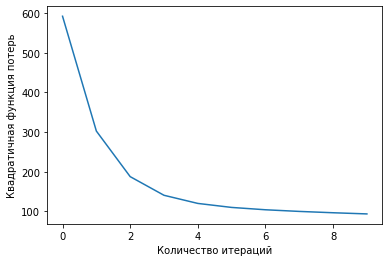

In [5]:
# создаем экземпляр класса SimpleLinearRegression_GD
model = SimpleLinearRegression_GD(lr=0.1, num_iter=10, fit_intercept=True)
# обучаем модель линейной регрессии
model.fit(boston.data, boston.target)

In [6]:
# создаем экземпляр класса SimpleLinearRegression_GD
custom_linreg_model = SimpleLinearRegression_GD(lr=0.1, num_iter=800, fit_intercept=False,
verbose=False, loss_visualize=False)

In [7]:
%%time
# обучаем модель собственной линейной регрессии
custom_linreg_model.fit(boston.data, boston.target)

Wall time: 38.9 ms


In [8]:
# получаем прогнозы
pred = custom_linreg_model.predict(boston.data)

In [9]:
# вычисляем R-квадрат
r2_score(boston.target, pred)

0.6625079947818229

# Координатный спуск на основе слегка измененного класса для градиентного спуска

In [10]:
# пишем собственный класс, строящий линейную регрессию
# с помощью метода координатного спуска
class SimpleLinearRegression_CD:
    """
    Параметры:
    lr: float, по умолчанию 0.01
    Темп обучения.
    num_iter: int, по умолчанию 10000
    Количество итераций.
    fit_intercept: bool, по умолчанию False
    Добавление константы.
    verbose: bool, по умолчанию True
    Печать результатов градиентного спуска.
    loss_visualize: bool, по умолчанию True
    Построение кривой функции потерь.
    """
    
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=False,
                 verbose=True, loss_visualize=True):
        # темп обучения
        self.lr = lr
        # количество итераций градиентного спуска
        self.num_iter = num_iter
        # добавление константы
        self.fit_intercept = fit_intercept
        # печать результатов градиентного спуска
        self.verbose = verbose
        # визуализация кривой функции потерь
        self.loss_visualize = loss_visualize
        # список, в котором будем хранить значения функции потерь
        self._loss_by_iter = []
        
    # частный метод __add_intercept добавляет константу
    def __add_intercept(self, X):
        # создаем массив из единиц, количество единиц
        # равно количеству наблюдений
        intercept = np.ones((X.shape[0], 1))
        # конкатенируем массив из единиц с массивом
        # признаков по оси столбцов
        return np.concatenate((intercept, X), axis=1)
    
    # частный метод __loss вычисляет значение квадратичной функции потерь
    def __loss(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)
    
    # метод .fit() осуществляет обучение модели, мы находим такие коэффициенты,
    # при которых значение квадратичной функции потерь будет минимальным
    def fit(self, X, y):
        # если задан fit_intercept=True, добавляем константу
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # инициализируем веса признаков нулями
        self.theta = np.zeros(X.shape[1])
        
        ## для координатного спуска и дальнейшего рисования изменения коэффициентов регрессии по итерациям
        self_theta_iter = np.zeros((self.num_iter, X.shape[1]))
        m = X.shape[1]
        ## Из Xavier
        ##X = X / (np.linalg.norm(X,axis = 0))
        
        # выполняем координатный спуск
        for i in range(self.num_iter):
            # вычисляем скалярное произведение
            # массива признаков и вектора весов
            y_pred = X.dot(self.theta)
            # вычисляем значение функции потерь
            loss = self.__loss(y, y_pred)
            # добавляем значение функции потерь в список
            self._loss_by_iter.append(loss)
                        
            # перебираем координаты
            for j in range(m):
                #Vectorized implementation
                X_j = X[:,j].reshape(-1,1)
                self.theta[j] -= self.lr * (X_j.T.dot(y_pred - y))/len(X)
                             
            ## для дальнейшего рисования изменения коэффициентов регрессии по итерациям
            self_theta_iter[i,:] = self.theta
            
            # если задано verbose=True, то печатаем номер итерации,
            # значение функции потерь и веса
            if self.verbose == True:
                print("Итерация:", i,
                      "Ф-ция потерь:", round(loss, 1),
                      "Коэфф-ты:", np.round(self.theta, 1))
        
        # если задано loss_visualize=True, то рисуем кривую функции потерь
        if self.loss_visualize == True:
            plt.plot(range(len(self._loss_by_iter)), self._loss_by_iter)
            plt.xticks(np.arange(0, self.num_iter, step=self.num_iter/5))
            plt.xlabel("Количество итераций")
            plt.ylabel("Квадратичная функция потерь")
            plt.show()
            
          # рисование изменения коэффициентов регрессии по итерациям
                        
            for l in range(m):
                plt.plot(range(self.num_iter), self_theta_iter[:,l], label=(str(l)))
            plt.xlabel("Количество итераций")
            plt.ylabel("Коэффициенты регрессии")
            plt.legend()
            plt.show()
        
    # метод .predict() дает прогнозы
    def predict(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # для получения прогноза мы просто умножаем
        # значения признаков на веса
        y_pred = X.dot(self.theta)
        return y_pred

In [11]:
# создаем экземпляр класса SimpleLinearRegression_CD
model_CD = SimpleLinearRegression_CD(lr=0.1, num_iter=800, fit_intercept=True, verbose=False)

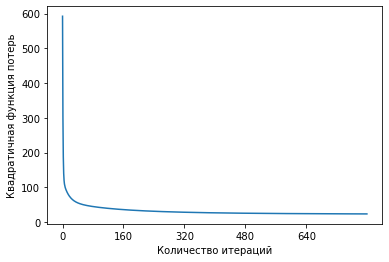

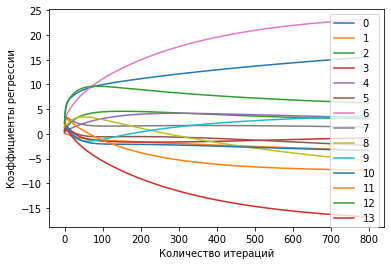

In [12]:
# обучаем модель линейной регрессии
model_CD.fit(boston.data, boston.target)

In [13]:
# создаем экземпляр класса SimpleLinearRegression_CD
custom_linreg_model_CD = SimpleLinearRegression_CD(lr=0.1, num_iter=800, fit_intercept=False,
verbose=False, loss_visualize=False)

In [14]:
%%time
# обучаем модель собственной линейной регрессии
custom_linreg_model_CD.fit(boston.data, boston.target)

Wall time: 94.1 ms


In [15]:
# получаем прогнозы
pred_CD = custom_linreg_model_CD.predict(boston.data)

In [16]:
# вычисляем R-квадрат
r2_score(boston.target, pred_CD)

0.6625079947818229

## Координатный спуск с LASSO-регуляризацией на основе слегка измененного класса для градиентного спуска

In [17]:
# пишем собственный класс, строящий линейную регрессию
# с помощью метода координатного спуска с LASSO-регуляризацией
class SimpleLinearRegression_CD_Lasso:
    """
    Параметры:
    lr: float, по умолчанию 0.01
    Темп обучения.
    num_iter: int, по умолчанию 10000
    Количество итераций.
    fit_intercept: bool, по умолчанию False
    Добавление константы.
    verbose: bool, по умолчанию True
    Печать результатов градиентного спуска.
    loss_visualize: bool, по умолчанию True
    Построение кривой функции потерь.
    """
    
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=False,
                 verbose=True, loss_visualize=True):
        # темп обучения
        self.lr = lr
        # количество итераций градиентного спуска
        self.num_iter = num_iter
        # добавление константы
        self.fit_intercept = fit_intercept
        # печать результатов градиентного спуска
        self.verbose = verbose
        # визуализация кривой функции потерь
        self.loss_visualize = loss_visualize
        # список, в котором будем хранить значения функции потерь
        self._loss_by_iter = []
        
    # частный метод __add_intercept добавляет константу
    def __add_intercept(self, X):
        # создаем массив из единиц, количество единиц
        # равно количеству наблюдений
        intercept = np.ones((X.shape[0], 1))
        # конкатенируем массив из единиц с массивом
        # признаков по оси столбцов
        return np.concatenate((intercept, X), axis=1)
    
    # частный метод __loss вычисляет значение квадратичной функции потерь
    def __loss(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)
    
    # частный метод вычисления пороговой функции для координатного спуска
    # с LASSO. См.https://xavierbourretsicotte.github.io/lasso_implementation.html
    def __soft_threshold(rho,lamda=0.1):
        '''Soft threshold function used for normalized data and lasso regression'''
        if rho < - lamda:
            return (rho + lamda)
        elif rho >  lamda:
            return (rho - lamda)
        else:
            return 0
    
    # метод .fit() осуществляет обучение модели, мы находим такие коэффициенты,
    # при которых значение квадратичной функции потерь будет минимальным
    def fit(self, X, y):
        # если задан fit_intercept=True, добавляем константу
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # инициализируем веса признаков нулями
        self.theta = np.zeros(X.shape[1])
        
        ## для координатного спуска и дальнейшего рисования изменения коэффициентов регрессии по итерациям
        self_theta_iter = np.zeros((self.num_iter, X.shape[1]))
        m = X.shape[1]
        X = X / (np.linalg.norm(X,axis = 0))
        
        # выполняем координатный спуск с LASSO
        for i in range(self.num_iter):
            # вычисляем скалярное произведение
            # массива признаков и вектора весов
            y_pred = X.dot(self.theta)
            # вычисляем значение функции потерь
            loss = self.__loss(y, y_pred)
            # добавляем значение функции потерь в список
            self._loss_by_iter.append(loss)
            
            # перебираем координаты
            for j in range(m):
                #Vectorized implementation
                X_j = X[:,j].reshape(-1,1)
                rho = (X_j.T.dot(y.reshape(-1,1) - y_pred.reshape(-1,1) + self.theta[j]*X_j))/len(X)
                y_pred = X.dot(self.theta)
                print('rho', rho)
                
                #Checking intercept parameter
                lambda_lasso = 0.1
                if self.fit_intercept == True:
                    if j == 0:
                        self.theta[j] =  rho
                    else:
                        if rho < - lambda_lasso:
                            rho_correct = rho + lambda_lasso
                        elif rho < - lambda_lasso:
                            rho_correct = rho - lambda_lasso
                        else:
                            rho_correct = 0
                        self.theta[j] = rho_correct  

                if self.fit_intercept == False:
                    if rho < - lambda_lasso:
                        rho_correct = rho + lambda_lasso
                    elif rho < - lambda_lasso:
                        rho_correct = rho - lambda_lasso
                    else:
                        rho_correct = 0
                        self.theta[j] = rho_correct  
             
            ## сохраняем историю для дальнейшего рисования изменения коэффициентов регрессии по итерациям
            self_theta_iter[i,:] = self.theta
            
            # если задано verbose=True, то печатаем номер итерации,
            # значение функции потерь и веса
            if self.verbose == True:
                print("Итерация:", i,
                      "Ф-ция потерь:", round(loss, 1),
                      "Коэфф-ты:", np.round(self.theta, 1))
        
        # если задано loss_visualize=True, то рисуем кривую функции потерь
        if self.loss_visualize == True:
            plt.plot(range(len(self._loss_by_iter)), self._loss_by_iter)
            plt.xticks(np.arange(0, self.num_iter, step=self.num_iter/5))
            plt.xlabel("Количество итераций")
            plt.ylabel("Квадратичная функция потерь")
            plt.show()
            
          # рисование изменения коэффициентов регрессии по итерациям
                        
            for l in range(m):
                plt.plot(range(self.num_iter), self_theta_iter[:,l], label=(str(l)))
            plt.xlabel("Количество итераций")
            plt.ylabel("Коэффициенты регрессии")
            plt.legend()
            plt.show()
        
    # метод .predict() дает прогнозы
    def predict(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # для получения прогноза мы просто умножаем
        # значения признаков на веса
        y_pred = X.dot(self.theta)
        return y_pred

In [18]:
# создаем экземпляр класса SimpleLinearRegression_CD_Lasso
model_CD_Lasso = SimpleLinearRegression_CD_Lasso(lr=0.1, num_iter=800, fit_intercept=True, verbose=False)

rho [[1.00170542]]
rho [[0.24147866]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [

rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [

rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho 

rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [

rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho 

rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [

rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [

rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [

rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [

rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho

rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho 

rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [

rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho 

rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho 

rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho 

rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho

rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [

rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [

rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [

rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [[0.85841591]]
rho [[0.84800732]]
rho [[0.58959799]]
rho [[0.6796455]]
rho [[0.86593618]]
rho [[1.00227949]]
rho [[0.67226216]]
rho [[1.00170542]]
rho [[0.24071241]]
rho [[0.57057026]]
rho [[0.7345763]]
rho [[0.33199577]]
rho [[0.7274985]]
rho [[1.03897499]]
rho [

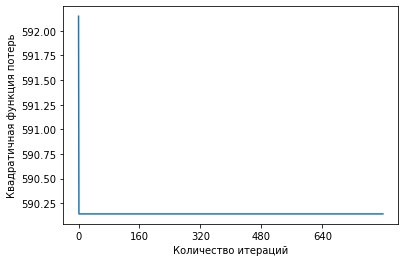

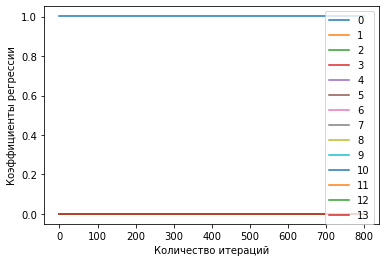

In [19]:
# обучаем модель линейной регрессии
model_CD_Lasso.fit(boston.data, boston.target)